In [1]:
from torch.utils.data import WeightedRandomSampler
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
from torchvision import datasets, models, transforms
import time
import os
import copy
from torch.utils.data import DataLoader, TensorDataset, WeightedRandomSampler
from torchvision.datasets import ImageFolder
import numpy as np
import matplotlib.pyplot as plt
import cv2
import numpy as np
import imageio as io
from PIL import Image
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import torchvision
import torchvision.transforms as transforms
from pytorch_lightning.callbacks import EarlyStopping
from pytorch_lightning.callbacks import ModelCheckpoint
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier

import torchmetrics
import pytorch_lightning as pl

import data_loader as dl
import experiments as e


!python --version
!nvcc --version
!pip install nvcc4jupyter
%load_ext nvcc4jupyter
class_names = ['abstract','animal-painting','cityscape', 'flower-painting','landscape','marina','nude-painting-nu','portrait','religious-painting','still-life']

num_classes = 10


Python 3.11.6
/usr/bin/sh: line 1: nvcc: command not found
Source files will be saved in "/tmp/tmpk1yv3kw8".


In [2]:
!pip install torchsampler
!pip install xgboost
!pip install torchmetrics
!pip install pytorch_lightning
!pip install optuna
!pip install memory_profiler
!pip install scikit-learn
!pip install matplotlib
! pip install imageio
! pip install cv2
! pip install scikit-image
!pip install opencv-python-headless

ERROR: Could not find a version that satisfies the requirement cv2 (from versions: none)
ERROR: No matching distribution found for cv2


In [3]:
class ArtStyleDataset(Dataset):
  def __init__(self, root_dir, transform = None, transform_tensor = None):
     self.imgs = ImageFolder(root_dir)
     self.root_dir = root_dir
     self.transform = transform
     self.transform_tensor = transform_tensor


  def __len__(self):
        return len(self.imgs)

  def __getitem__(self, idx):
        sample, label = self.imgs[idx]
        if self.transform:
            sample = self.transform(sample)
        return sample, label
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])
data = ArtStyleDataset('genres', transform)


In [4]:
model_name ="resnet_2_genres"

class Model (torch.nn.Module):
  def __init__(self, layer_name: str = 'layer2'):
     super(Model, self).__init__()
     self.model = models.resnet18(pretrained=True)
     self.layer_name = layer_name

     self.activations = dict()

     def hook(module, input, output):
        self.activations[layer_name] = output

     self.model.get_submodule(layer_name).register_forward_hook(hook)

  def forward(self, x):
        _ = self.model(x)
        return self.activations[self.layer_name]

In [9]:
device = 'cuda'

model = Model().to(device)
dataset = dl.data_load(data)
train_data , train_labels,map_img_feature = dl.extract_features(model, dataset)
dl.save_pickle(train_data,train_labels, model_name)

(128,)
(227,)
----------------------------------
(128,)


/opt/conda/lib/python3.11/site-packages/skimage/feature/texture.py:385: UserWarning: Applying `local_binary_pattern` to floating-point images may give unexpected results when small numerical differences between adjacent pixels are present. It is recommended to use this function with images of integer dtype.
  warnings.warn(


(227,)
----------------------------------
(128,)
(227,)
----------------------------------
(128,)
(227,)
----------------------------------
(128,)
(227,)
----------------------------------
(128,)
(227,)
----------------------------------
(128,)
(227,)
----------------------------------
(128,)
(227,)
----------------------------------
(128,)
(227,)
----------------------------------
(128,)
(227,)
----------------------------------
(128,)
(227,)
----------------------------------
(128,)
(227,)
----------------------------------
(128,)
(227,)
----------------------------------
(128,)
(227,)
----------------------------------
(128,)
(227,)
----------------------------------
(128,)
(227,)
----------------------------------
(128,)
(227,)
----------------------------------
(128,)
(227,)
----------------------------------
(128,)
(227,)
----------------------------------
(128,)
(227,)
----------------------------------
(128,)
(227,)
----------------------------------
(128,)
(227,)
-------------

In [11]:
model_name ="resnet_3_genres"

class Model (torch.nn.Module):
  def __init__(self, layer_name: str = 'layer3'):
     super(Model, self).__init__()
     self.model = models.resnet18(pretrained=True)
     self.layer_name = layer_name

     self.activations = dict()

     def hook(module, input, output):
        self.activations[layer_name] = output

     self.model.get_submodule(layer_name).register_forward_hook(hook)

  def forward(self, x):
        _ = self.model(x)
        return self.activations[self.layer_name]

In [12]:
device = 'cuda'

model = Model().to(device)
dataset = dl.data_load(data)
train_data , train_labels,map_img_feature = dl.extract_features(model, dataset)
dl.save_pickle(train_data,train_labels, model_name)

/opt/conda/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


(256,)
(355,)
----------------------------------
(256,)
(355,)
----------------------------------
(256,)
(355,)
----------------------------------
(256,)
(355,)
----------------------------------
(256,)
(355,)
----------------------------------
(256,)
(355,)
----------------------------------
(256,)
(355,)
----------------------------------
(256,)
(355,)
----------------------------------
(256,)
(355,)
----------------------------------
(256,)
(355,)
----------------------------------
(256,)
(355,)
----------------------------------
(256,)
(355,)
----------------------------------
(256,)
(355,)
----------------------------------
(256,)
(355,)
----------------------------------
(256,)
(355,)
----------------------------------
(256,)
(355,)
----------------------------------
(256,)
(355,)
----------------------------------
(256,)
(355,)
----------------------------------
(256,)
(355,)
----------------------------------
(256,)
(355,)
----------------------------------
(256,)
(355,)
------

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(train_data, train_labels, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
train_data_scaled = scaler.fit_transform(train_data)

train_labels = np.array(train_labels)
train_labels = train_labels.ravel()


print(f"Train: {len(X_train)}, Test: {len(X_test)}")

Train: 20949, Test: 5238


/opt/conda/lib/python3.11/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                    precision    recall  f1-score      support
abstract             0.891980  0.884740  0.888346   616.000000
animal-painting      0.714286  0.800000  0.754717   325.000000
cityscape            0.819063  0.778802  0.798425   651.000000
flower-painting      0.796791  0.866279  0.830084   344.000000
landscape            0.808475  0.803030  0.805743   594.000000
marina               0.844011  0.875723  0.859574   346.000000
nude-painting-nu     0.878010  0.852025  0.864822   642.000000
portrait             0.836661  0.879771  0.857674   524.000000
religious-painting   0.809603  0.779904  0.794476   627.000000
still-life           0.850829  0.811951  0.830935   569.000000
accuracy             0.830279  0.830279  0.830279     0.830279
macro avg            0.824971  0.833223  0.828480  5238.000000
weighted avg         0.831425  0.830279  0.830360  5238.000000
-----------------------------------------------------------------------------------------------------------


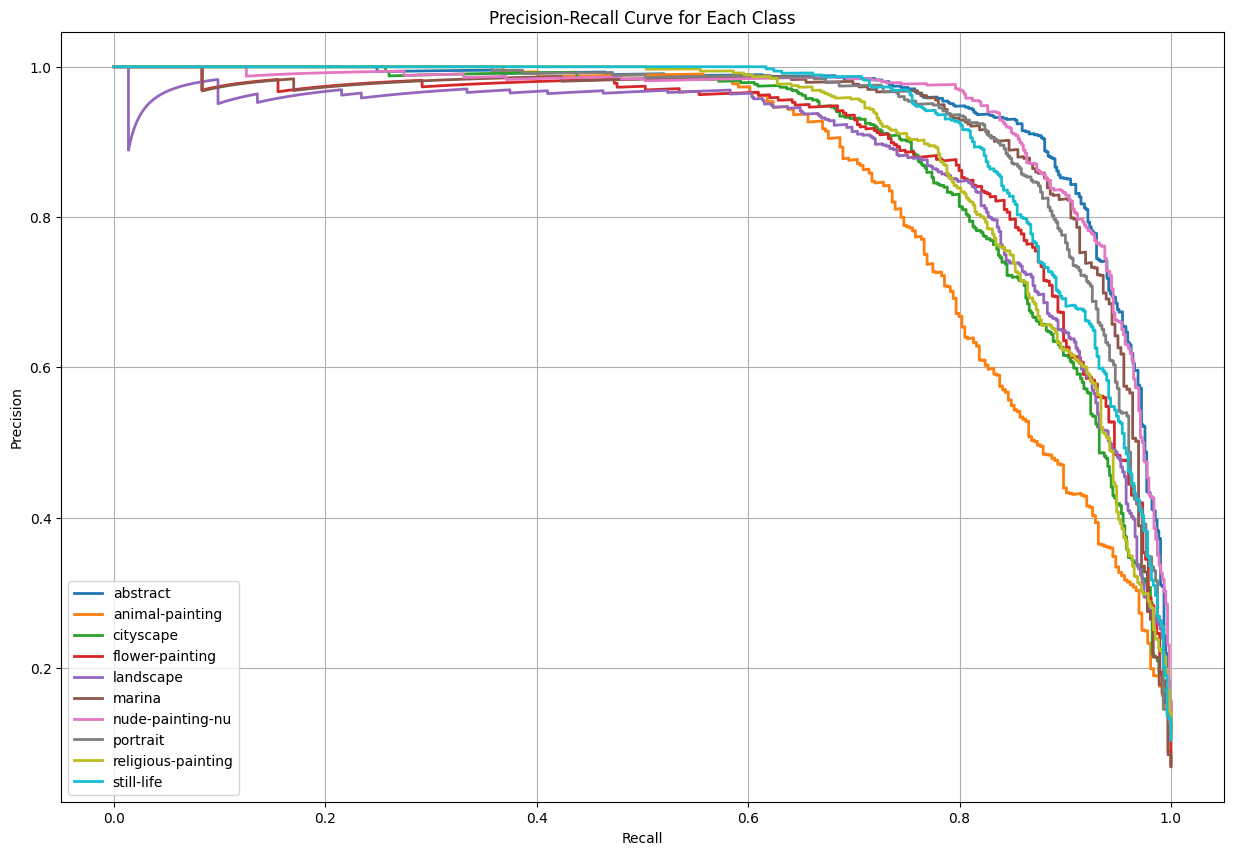

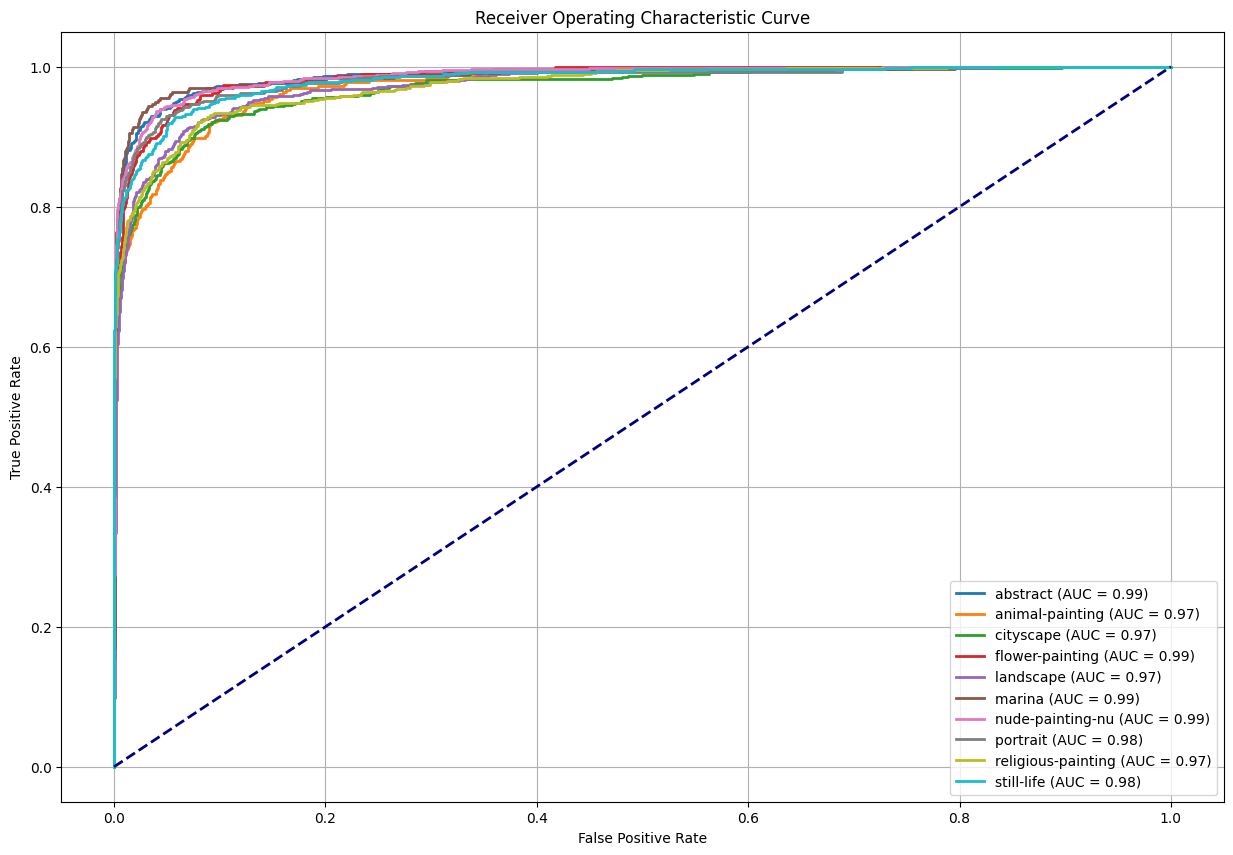

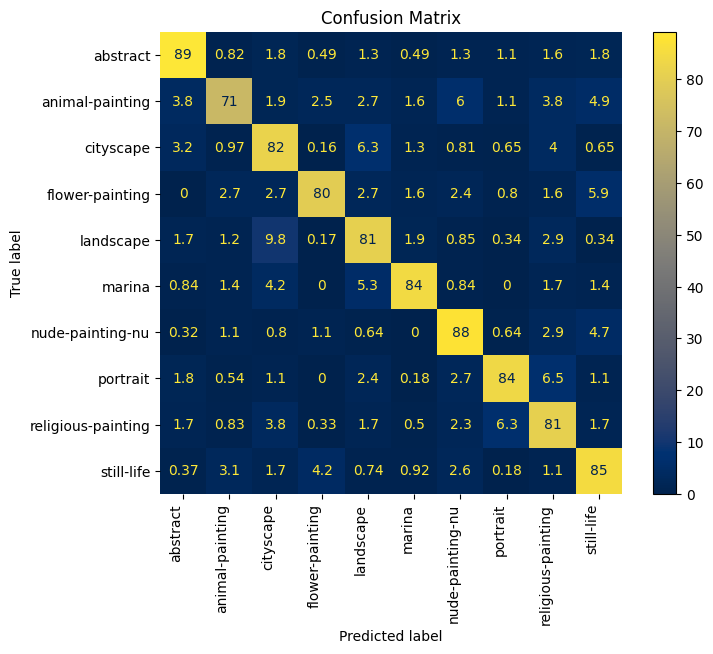

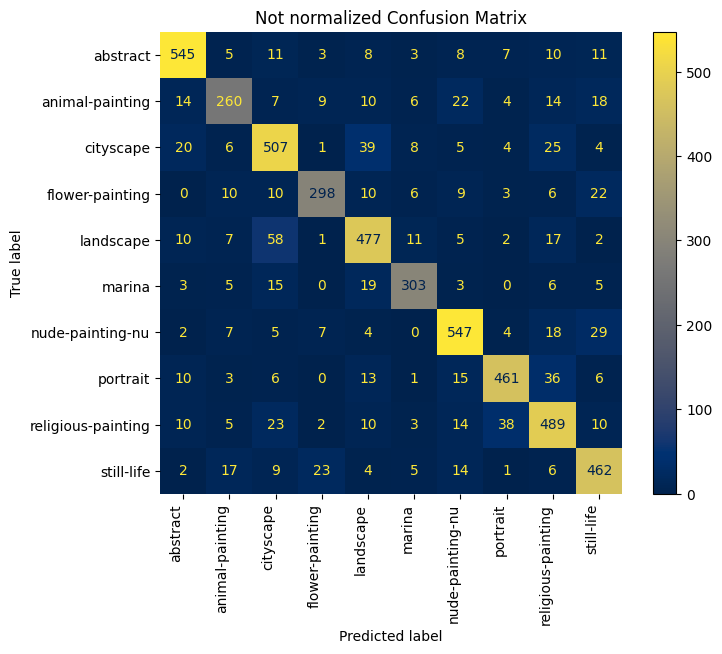

In [17]:
from sklearn.svm import SVC

svc_model = SVC(
    kernel='poly', 
    C=60.38139932266792, 
    gamma=3.011984770287577, 
    degree=2, 
    random_state=42,
    probability = True
)

svc_model.fit(X_train_scaled, y_train)
frmodel_pred = svc_model.predict(X_test_scaled)
frmodel_pred_proba = svc_model.predict_proba(X_test_scaled)

evaluate_model(y_test,frmodel_pred,frmodel_pred_proba)

In [18]:
avg= e.kfold_crossvalidation(train_data, train_labels, 5,  svc_model , 1)
print(avg)

       Fold  Precision    Recall        F1  Accuracy  Train time  \
0         1   0.841885  0.840588  0.840662  0.840588  311.521235   
1         2   0.830753  0.829515  0.829506  0.829515  308.388461   
2         3   0.828573  0.827000  0.827089  0.827000  311.201787   
3         4   0.845089  0.843613  0.843664  0.843613  317.575425   
4         5   0.830733  0.829292  0.829400  0.829292  315.175507   
5   Average   0.835406  0.834002  0.834064  0.834002  312.772483   
6  1.581139   0.007515  0.007535  0.007531  0.007535    3.608848   

   Prediction time  
0        11.576069  
1        11.464346  
2        12.035577  
3        12.157396  
4        11.508359  
5        11.748349  
6         0.323169  


In [5]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score
import  numpy as np
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import time
import psutil
import pandas as pd
from sklearn.metrics import  ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import (
    classification_report, roc_curve, auc, precision_recall_curve, confusion_matrix
)
def precision_recall_draw(y_true, y_score):
    from sklearn.preprocessing import label_binarize
    from sklearn.metrics import precision_recall_curve

    y_test_bin = label_binarize(y_true, classes=[i for i in range(len(class_names))])

    plt.figure(figsize=(15, 10))
    for i, class_name in enumerate(class_names):
        precision, recall, _ = precision_recall_curve(y_test_bin[:, i], y_score[:, i])
        plt.plot(recall, precision, lw=2, label=f'{class_name}')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve for Each Class')
    plt.legend(loc="best")
    plt.grid(True)
    plt.show()


def roc_draw(y_true, y_score):
  from sklearn.preprocessing import label_binarize
  plt.figure(figsize=(15, 10))
  y_test_bin = label_binarize(y_true, classes=[i for i in range(len(class_names))])


  for i, class_name in enumerate(class_names):
     fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
     roc_auc = auc(fpr, tpr)
     plt.plot(fpr, tpr, lw=2, label=f'{class_name} (AUC = {roc_auc:.2f})')


  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic Curve')
  plt.legend(loc="best")
  plt.grid(True)
  plt.show()


def evaluate_model(y_true, y_pred, y_pred_proba):
    report_dict = classification_report(y_pred, y_true, target_names=class_names, output_dict=True)
    metrics_df2 = pd.DataFrame(report_dict).transpose()
    print(metrics_df2)
    print("-----------------------------------------------------------------------------------------------------------")

    precision_recall_draw(y_true, y_pred_proba)
    roc_draw(y_true, y_pred_proba)
    cm =confusion_matrix(y_true, y_pred, normalize = 'true')
    #cm_percent_row = cm.astype('float') / cm.sum(axis=1, keepdims=True) * 100
    
    disp = ConfusionMatrixDisplay(cm*100, display_labels=class_names)

    fig, ax = plt.subplots(figsize=(8, 6))
    disp.plot(cmap="cividis", ax=ax) 
    for _, spine in ax.spines.items():
        spine.set_visible(False)  

    plt.xticks(rotation=90, ha="right")
    plt.yticks(rotation=0)
    plt.grid(False) 
    plt.title("Confusion Matrix")
    #plt.colorbar(ax.collections[0], ax=ax)  
    disp = ConfusionMatrixDisplay(confusion_matrix(y_true, y_pred), display_labels=class_names)

    fig, ax = plt.subplots(figsize=(8, 6))
    disp.plot(cmap="cividis", ax=ax) 
    for _, spine in ax.spines.items():
        spine.set_visible(False)  

    plt.xticks(rotation=90, ha="right")
    plt.yticks(rotation=0)
    plt.grid(False) 
    plt.title("Not normalized Confusion Matrix")
    plt.show()

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pickle

with open('X_resnet_2_genres.pickle', 'rb') as handle:
    train_data = pickle.load(handle)
with open('Y_resnet_2_genres.pickle', 'rb') as handle:
    train_labels = pickle.load(handle)

X_train, X_test, y_train, y_test = train_test_split(train_data, train_labels, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
train_data_scaled = scaler.fit_transform(train_data)

train_labels = np.array(train_labels)
train_labels = train_labels.ravel()


print(f"Train: {np.shape(X_train)}, Test: {np.shape(X_test)}")
print(f"Train: {np.shape(train_data)}, Test: {np.shape(train_labels)}")

Train: (20949, 227), Test: (5238, 227)
Train: (26187, 227), Test: (26187,)


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(train_data, train_labels, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
train_data_scaled = scaler.fit_transform(train_data)

train_labels = np.array(train_labels)
train_labels = train_labels.ravel()


print(f"Train: {len(X_train)}, Test: {len(X_test)}")

Train: 20949, Test: 5238


                    precision    recall  f1-score      support
abstract             0.734940  0.924242  0.818792   462.000000
animal-painting      0.705882  0.717949  0.711864   351.000000
cityscape            0.776042  0.666170  0.716921   671.000000
flower-painting      0.728000  0.769014  0.747945   355.000000
landscape            0.728814  0.740103  0.734415   581.000000
marina               0.772472  0.749319  0.760719   367.000000
nude-painting-nu     0.767255  0.752756  0.759936   635.000000
portrait             0.767169  0.739903  0.753289   619.000000
religious-painting   0.735441  0.742857  0.739130   595.000000
still-life           0.742268  0.717608  0.729730   602.000000
accuracy             0.747232  0.747232  0.747232     0.747232
macro avg            0.745828  0.751992  0.747274  5238.000000
weighted avg         0.748363  0.747232  0.746187  5238.000000
-----------------------------------------------------------------------------------------------------------


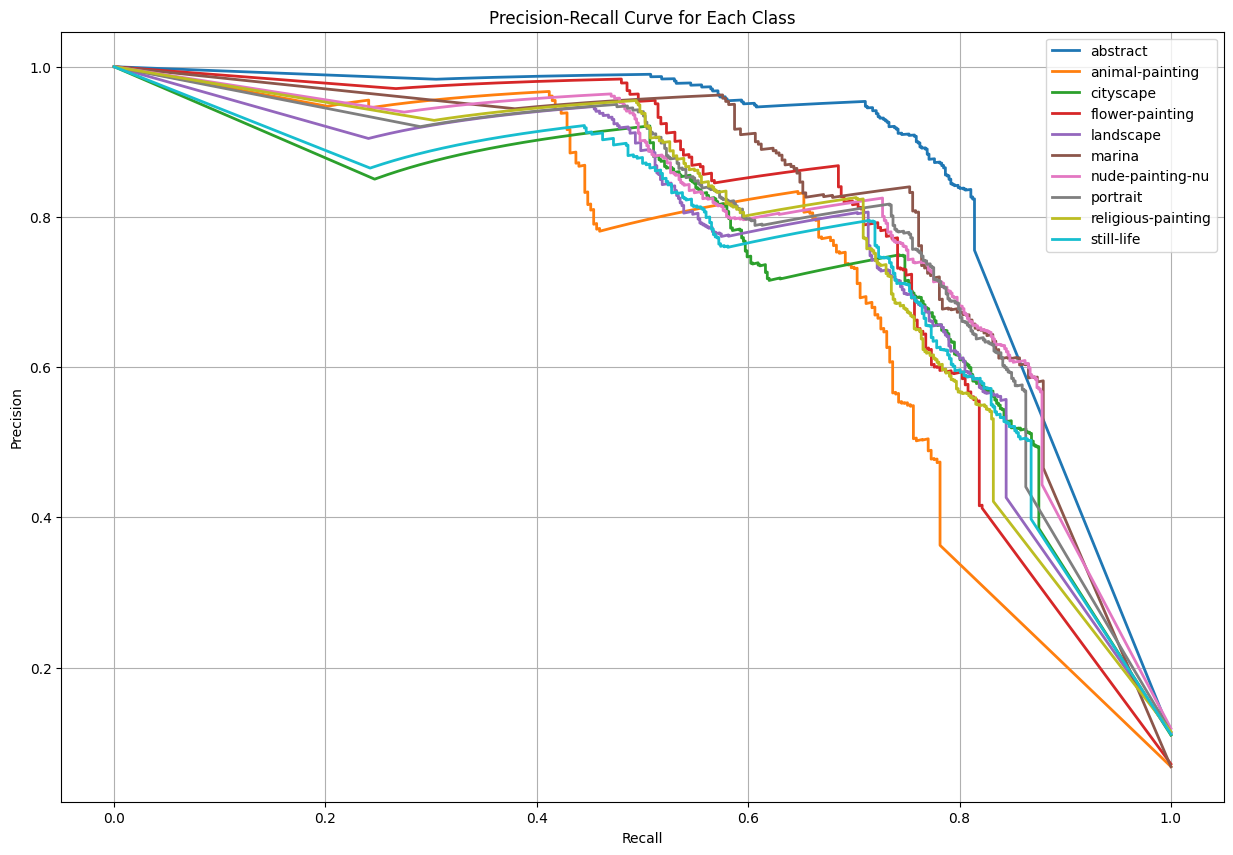

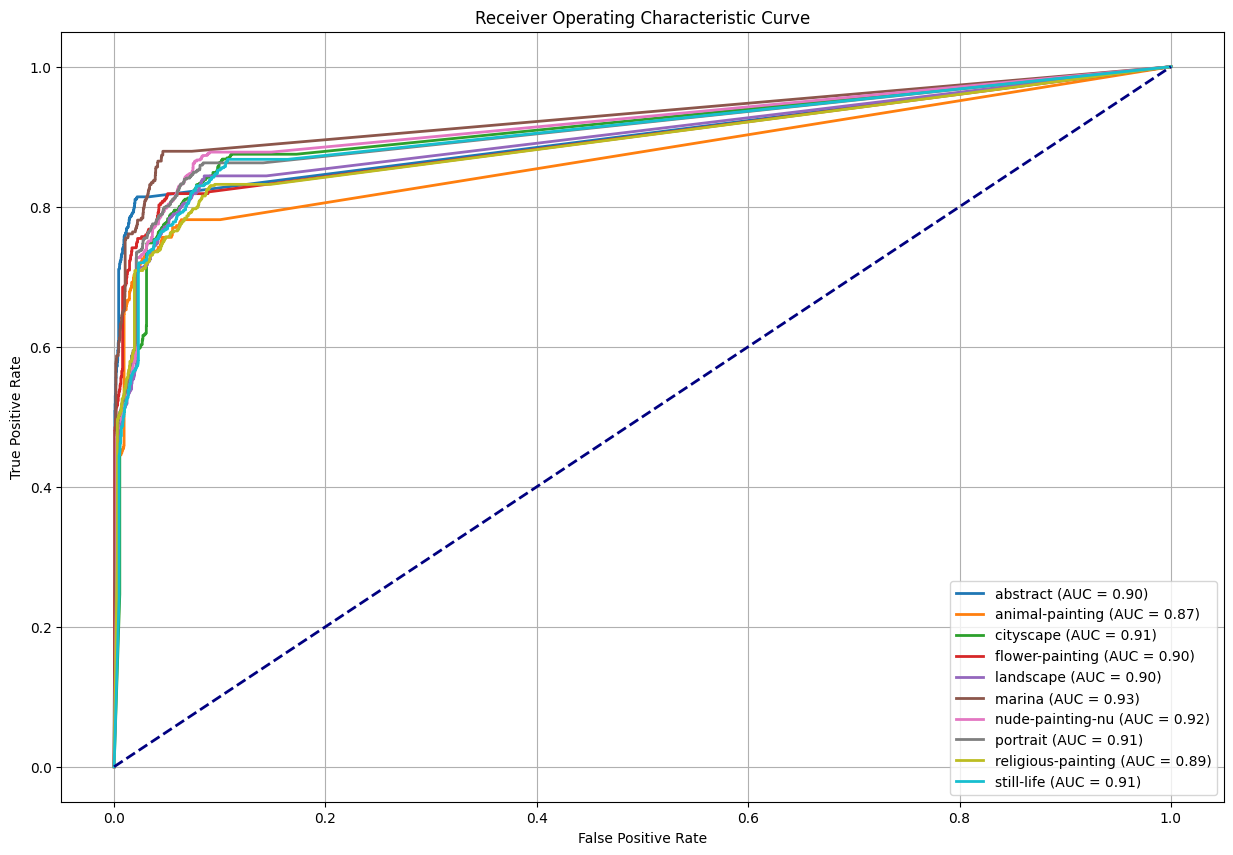

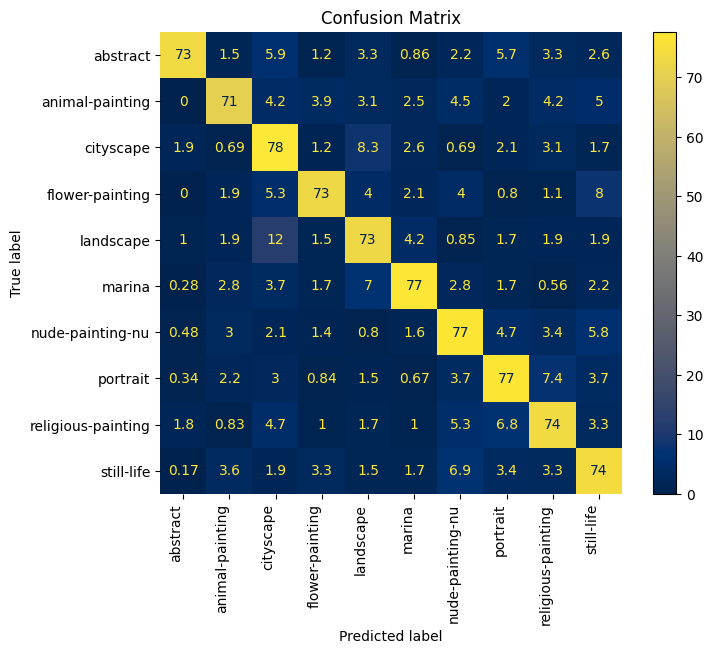

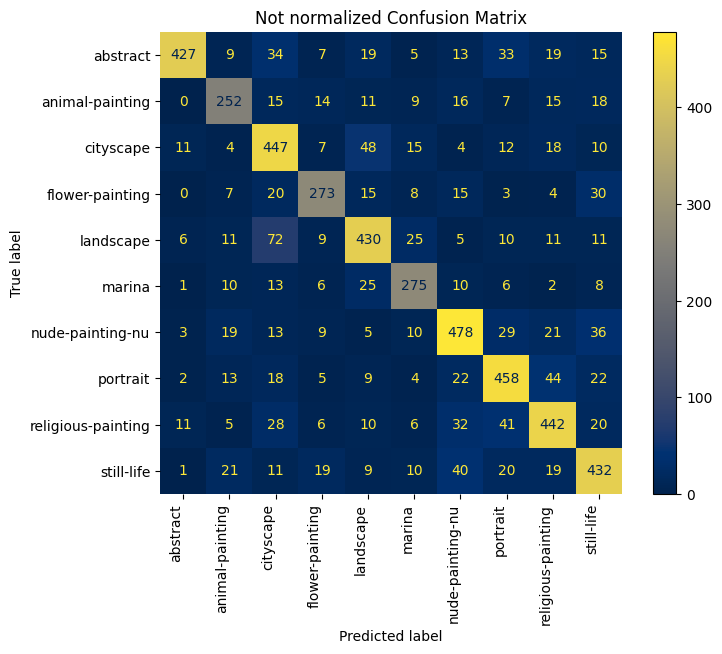

In [8]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(
    metric='manhattan',
    algorithm='auto',
    n_neighbors=3,
    weights='distance',
    leaf_size=40,
    p=1  
)

knn_model.fit(X_train_scaled, y_train)
frmodel_pred = knn_model.predict(X_test_scaled)
frmodel_pred_proba = knn_model.predict_proba(X_test_scaled)

evaluate_model(y_test,frmodel_pred,frmodel_pred_proba)

In [9]:
knn_model = KNeighborsClassifier(
    metric='manhattan',
    algorithm='auto',
    n_neighbors=3,
    weights='distance',
    leaf_size=40,
    p=1  
)
avg= e.kfold_crossvalidation(train_data, train_labels, 5,  knn_model , 1)
print(avg)

       Fold  Precision    Recall        F1  Accuracy  Train time  \
0         1   0.760530  0.754677  0.755752  0.754677    0.025295   
1         2   0.753252  0.747232  0.748403  0.747232    0.031726   
2         3   0.764939  0.757686  0.758250  0.757686    0.034795   
3         4   0.763160  0.757304  0.758353  0.757304    0.040343   
4         5   0.758987  0.752530  0.753490  0.752530    0.037128   
5   Average   0.760174  0.753886  0.754850  0.753886    0.033858   
6  1.581139   0.004502  0.004268  0.004125  0.004268    0.005734   

   Prediction time  
0         1.064016  
1         0.908831  
2         1.005284  
3         1.008453  
4         0.909899  
5         0.979297  
6         0.067978  


                    precision    recall  f1-score      support
abstract             0.898451  0.850163  0.873640   614.000000
animal-painting      0.711485  0.796238  0.751479   319.000000
cityscape            0.822917  0.828671  0.825784   572.000000
flower-painting      0.794667  0.861272  0.826630   346.000000
landscape            0.818644  0.811765  0.815190   595.000000
marina               0.839888  0.859195  0.849432   348.000000
nude-painting-nu     0.850722  0.780560  0.814132   679.000000
portrait             0.854271  0.823910  0.838816   619.000000
religious-painting   0.787022  0.832746  0.809239   568.000000
still-life           0.804124  0.809689  0.806897   578.000000
accuracy             0.823024  0.823024  0.823024     0.823024
macro avg            0.818219  0.825421  0.821124  5238.000000
weighted avg         0.825104  0.823024  0.823443  5238.000000
-----------------------------------------------------------------------------------------------------------


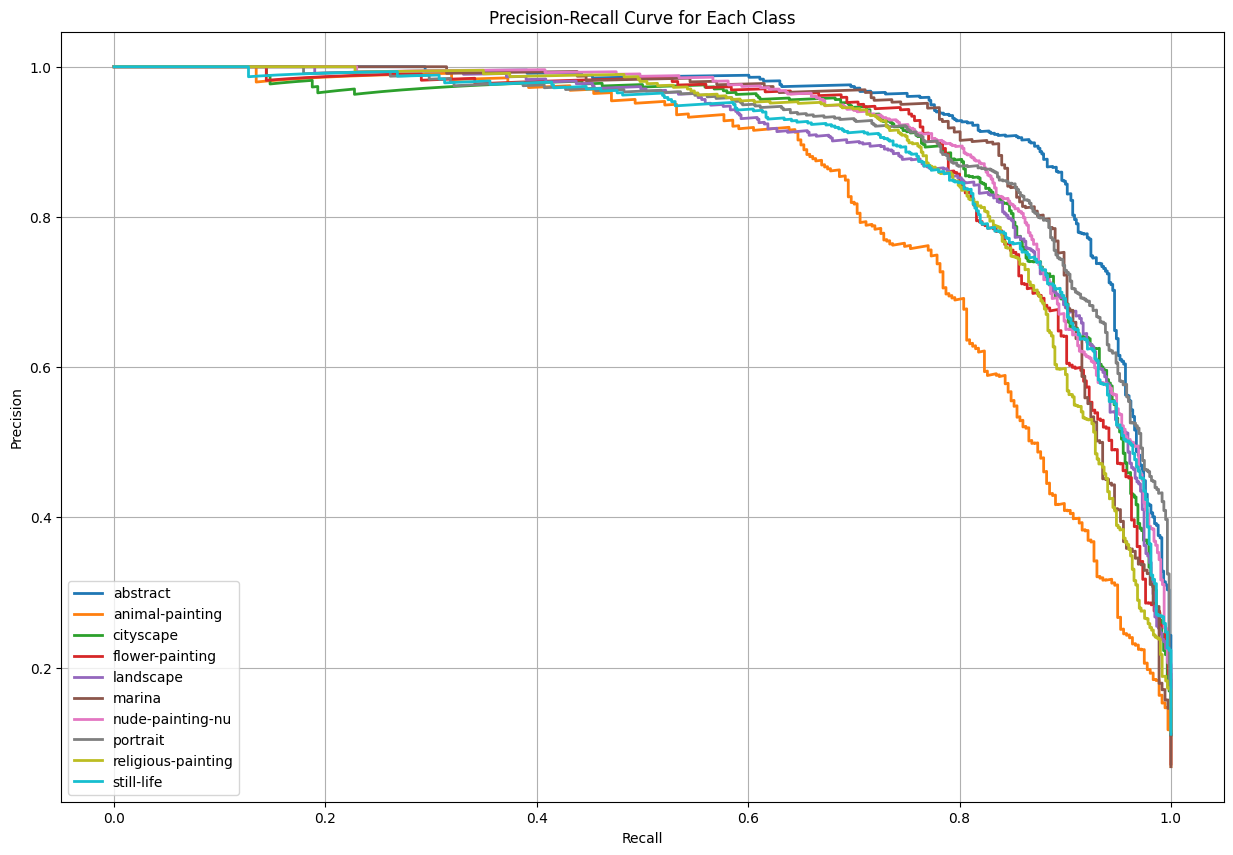

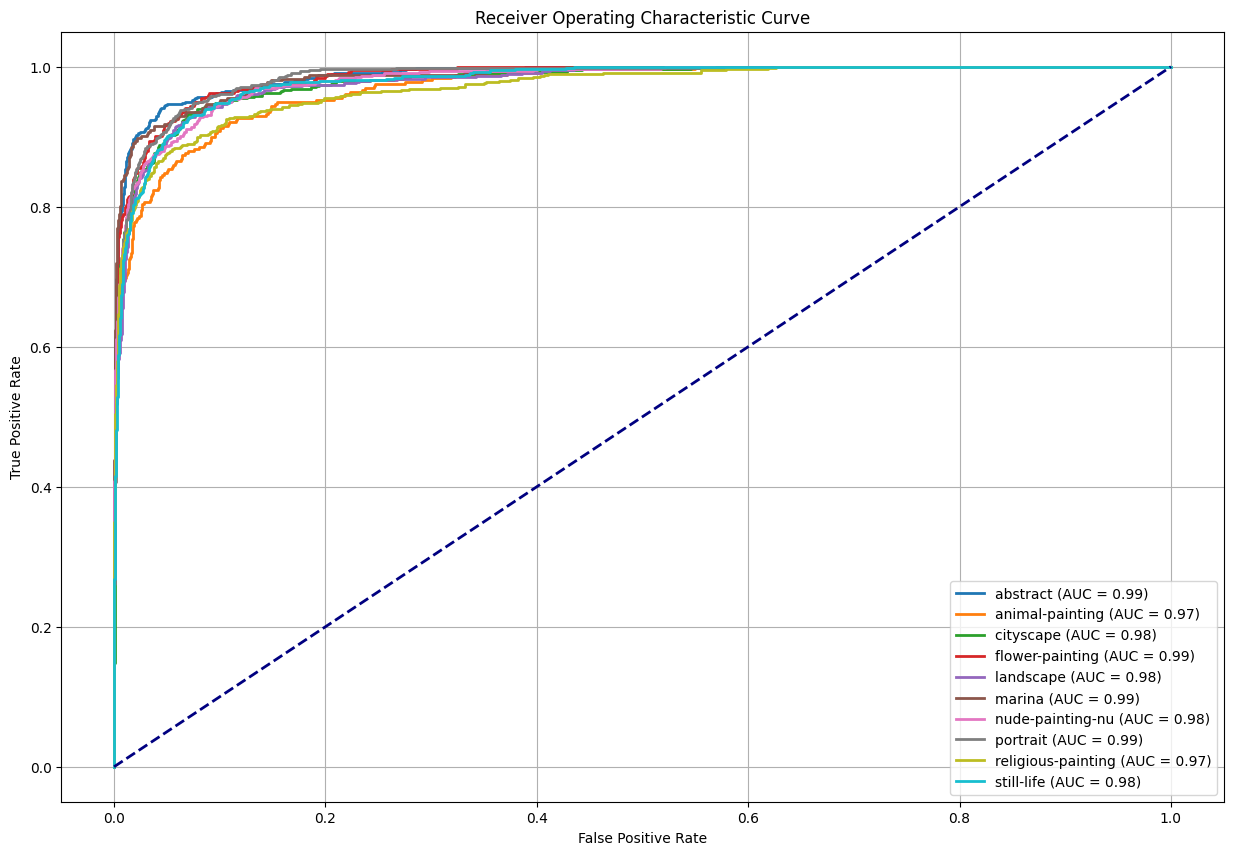

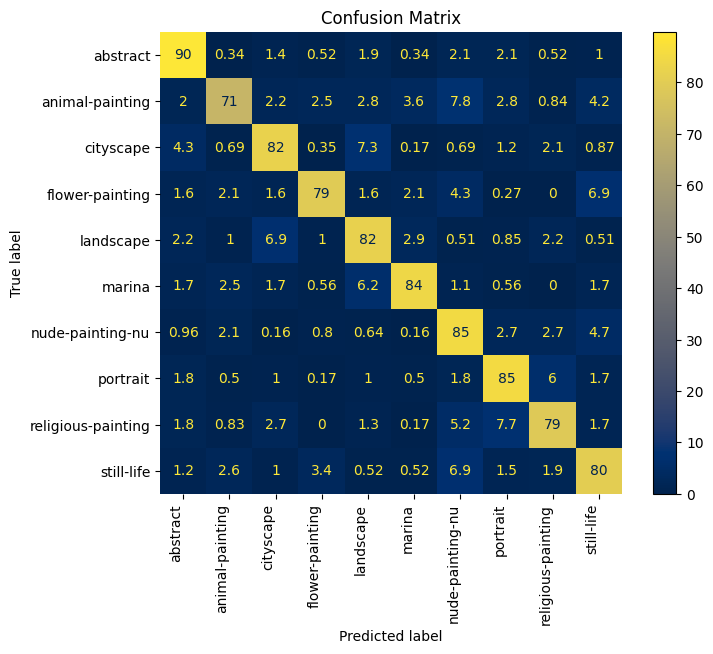

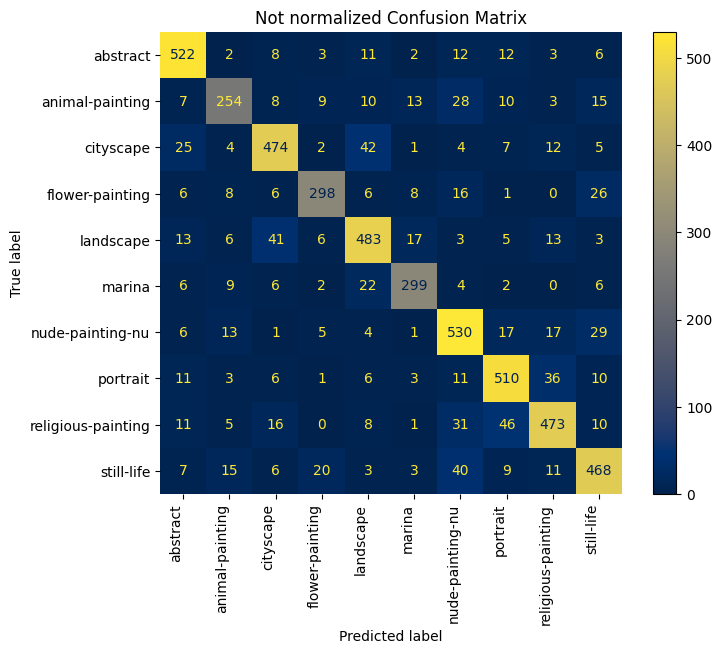

In [10]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(
    n_estimators=700,
    max_depth=6,
    learning_rate=0.06880464674379164,
    subsample=0.5717805315996993,
    colsample_bytree=0.72163837917479,
    gamma= 0.739211143509742,
    reg_lambda=0.31918802481802655,
    reg_alpha=0.5515715243593446,
    objective="multi:softmax",  
    eval_metric="mlogloss",
    tree_method="hist", 
)
xgb_model.fit(X_train_scaled, y_train)
frmodel_pred = xgb_model.predict(X_test_scaled)
frmodel_pred_proba = xgb_model.predict_proba(X_test_scaled)

evaluate_model(y_test,frmodel_pred,frmodel_pred_proba)


In [11]:
xgb_model = xgb.XGBClassifier(
    n_estimators=700,
    max_depth=6,
    learning_rate=0.06880464674379164,
    subsample=0.5717805315996993,
    colsample_bytree=0.72163837917479,
    gamma= 0.739211143509742,
    reg_lambda=0.31918802481802655,
    reg_alpha=0.5515715243593446,
    objective="multi:softmax",  
    eval_metric="mlogloss",
    tree_method="hist", 
)
avg= e.kfold_crossvalidation(train_data, train_labels, 5,  xgb_model , 1)
print(avg)

       Fold  Precision    Recall        F1  Accuracy  Train time  \
0         1   0.830976  0.830851  0.830552  0.830851   37.729591   
1         2   0.819316  0.818060  0.817844  0.818060   37.686890   
2         3   0.832529  0.832156  0.831901  0.832156   37.486056   
3         4   0.841793  0.840749  0.840539  0.840749   38.486818   
4         5   0.823523  0.823181  0.822583  0.823181   38.477883   
5   Average   0.829627  0.828999  0.828684  0.828999   37.973448   
6  1.581139   0.008687  0.008731  0.008791  0.008731    0.473586   

   Prediction time  
0         0.024802  
1         0.026559  
2         0.030939  
3         0.026577  
4         0.029215  
5         0.027618  
6         0.002435  


                    precision    recall  f1-score      support
abstract             0.888124  0.793846  0.838343   650.000000
animal-painting      0.627451  0.896000  0.738056   250.000000
cityscape            0.788194  0.807829  0.797891   562.000000
flower-painting      0.733333  0.867508  0.794798   317.000000
landscape            0.823729  0.743119  0.781350   654.000000
marina               0.789326  0.861963  0.824047   326.000000
nude-painting-nu     0.844302  0.714674  0.774099   736.000000
portrait             0.837521  0.776398  0.805802   644.000000
religious-painting   0.747088  0.840824  0.791189   534.000000
still-life           0.788660  0.812389  0.800349   565.000000
accuracy             0.796105  0.796105  0.796105     0.796105
macro avg            0.786773  0.811455  0.794592  5238.000000
weighted avg         0.803918  0.796105  0.796642  5238.000000
-----------------------------------------------------------------------------------------------------------


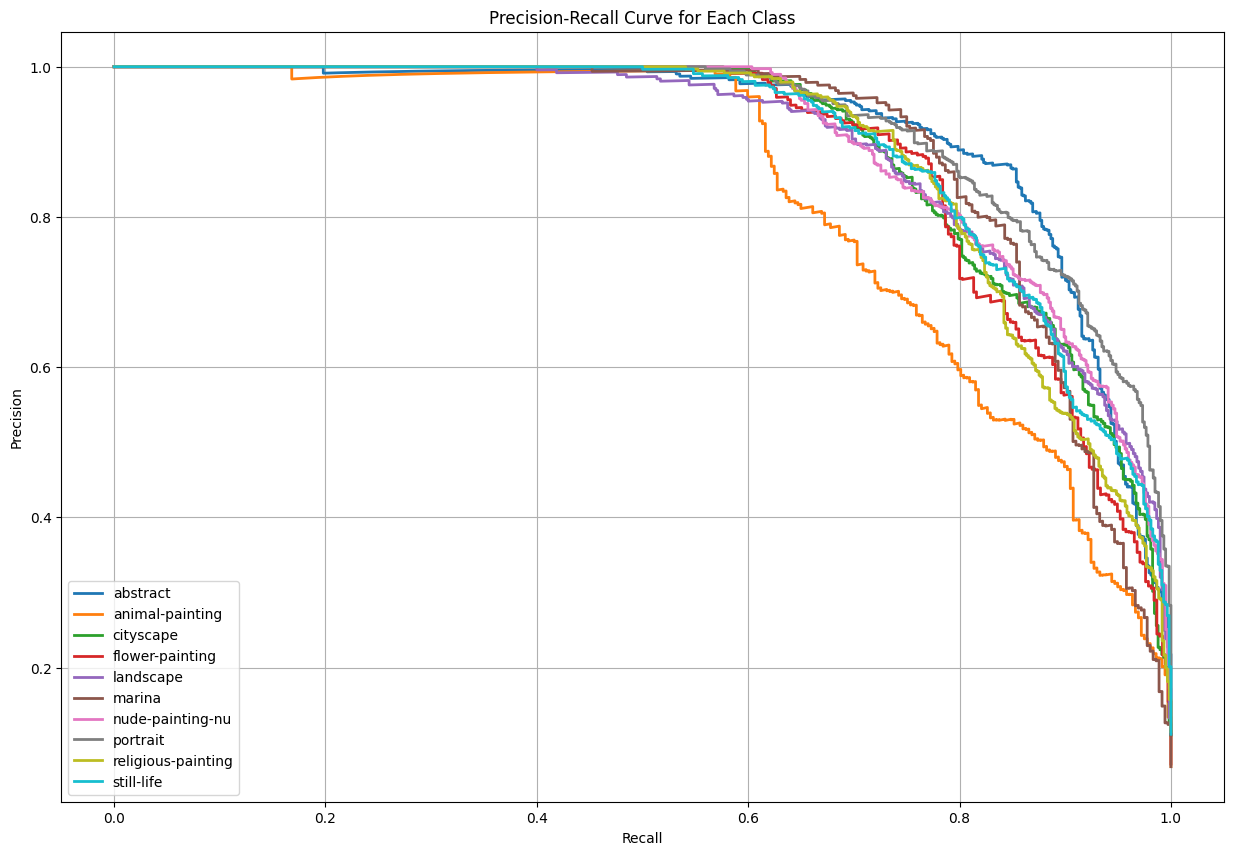

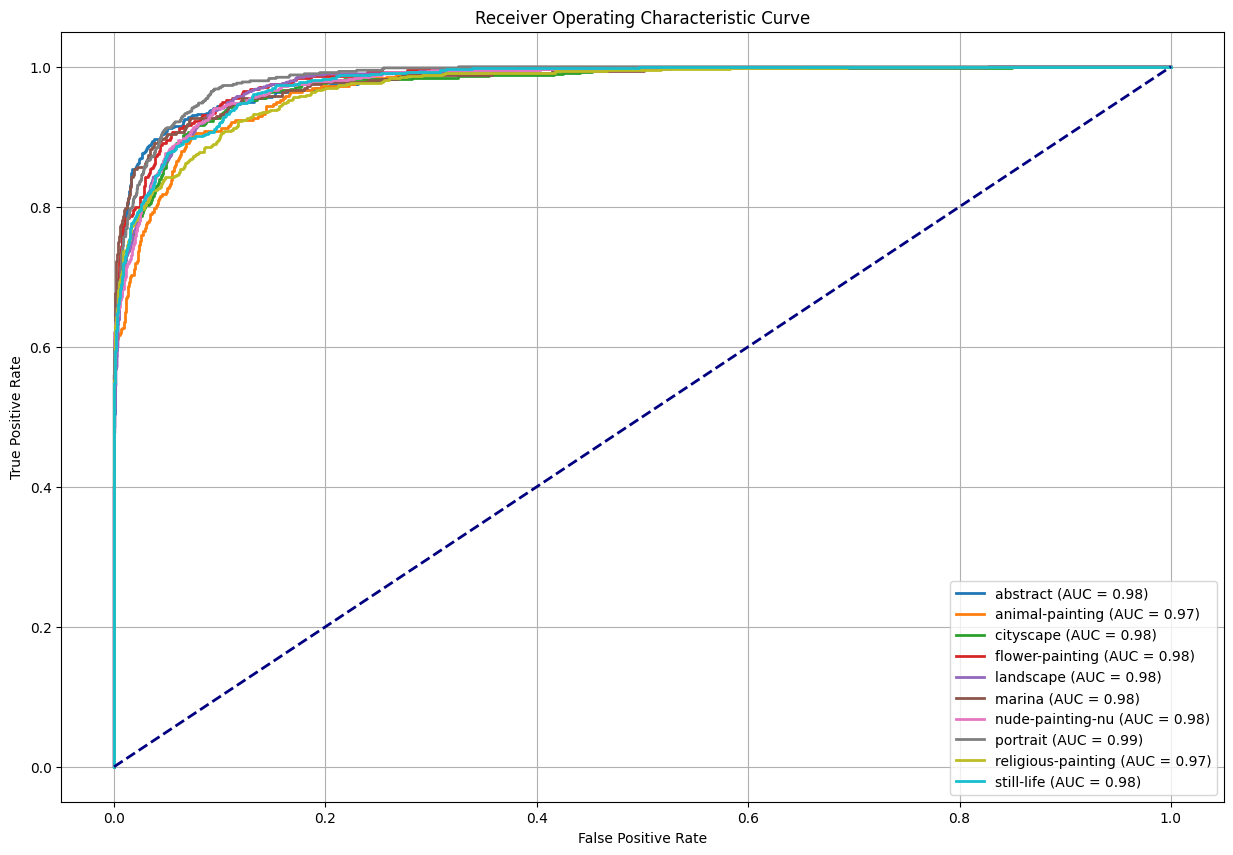

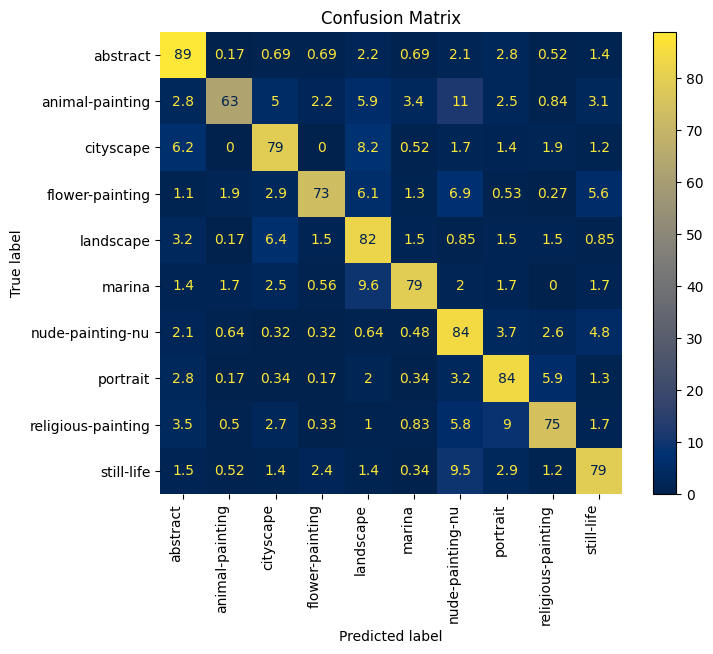

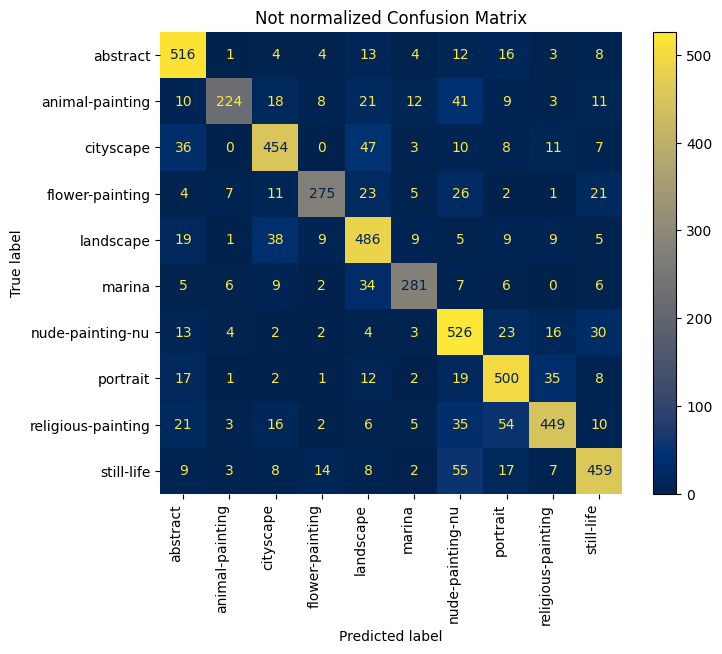

In [12]:
from sklearn.ensemble import RandomForestClassifier

rfmodel = RandomForestClassifier(n_estimators = 1100, 
                                 max_depth = 31, 
                                 min_samples_split =  8,
                                 min_samples_leaf = 2, 
                                 max_features = 'sqrt', 
                                 bootstrap = False,  
                                 criterion = 'gini')
rfmodel.fit(X_train_scaled, y_train)
frmodel_pred = rfmodel.predict(X_test_scaled)
frmodel_pred_proba = rfmodel.predict_proba(X_test_scaled)

evaluate_model(y_test,frmodel_pred,frmodel_pred_proba)

In [13]:
rfmodel = RandomForestClassifier(n_estimators = 1100, 
                                 max_depth = 31, 
                                 min_samples_split =  8,
                                 min_samples_leaf = 2, 
                                 max_features = 'sqrt', 
                                 bootstrap = False,  
                                 criterion = 'gini')
avg= e.kfold_crossvalidation(train_data, train_labels, 5,  rfmodel , 1)
print(avg)

       Fold  Precision    Recall        F1  Accuracy  Train time  \
0         1   0.807010  0.802596  0.801801  0.802596  433.264760   
1         2   0.798137  0.792478  0.792157  0.792478  433.276854   
2         3   0.814440  0.810197  0.809751  0.810197  438.588569   
3         4   0.821486  0.814779  0.814728  0.814779  433.939650   
4         5   0.802504  0.797785  0.796737  0.797785  432.112377   
5   Average   0.808715  0.803567  0.803035  0.803567  434.236442   
6  1.581139   0.009344  0.009042  0.009238  0.009042    2.520204   

   Prediction time  
0         1.181741  
1         1.149128  
2         1.117943  
3         1.184895  
4         1.060197  
5         1.138781  
6         0.051693  


In [14]:
model_name ="densenet_tr3_genres"
from torch.utils.data import WeightedRandomSampler
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
from torchvision import datasets, models, transforms
import time
import os
import copy
from torch.utils.data import DataLoader, TensorDataset, WeightedRandomSampler
from torchvision.datasets import ImageFolder
import numpy as np
import matplotlib.pyplot as plt
import cv2
import numpy as np
import imageio as io
from PIL import Image
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import torchvision
import torchvision.transforms as transforms
from pytorch_lightning.callbacks import EarlyStopping
from pytorch_lightning.callbacks import ModelCheckpoint
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier

import torchmetrics
import pytorch_lightning as pl

import data_loader as dl
import experiments as e


!python --version
!nvcc --version
!pip install nvcc4jupyter
%load_ext nvcc4jupyter
class_names = ['abstract','animal-painting','cityscape', 'flower-painting','landscape','marina','nude-painting-nu','portrait','religious-painting','still-life']

num_classes = 10


class Model (torch.nn.Module):
  # def __init__(self, layer_name: str = 'features.4'): layer1
  def __init__(self, layer_name: str = 'features.transition3'):
     super(Model, self).__init__()
     self.model = models.densenet121(pretrained=True)
     self.layer_name = layer_name

     self.activations = dict()

     def hook(module, input, output):
        self.activations[layer_name] = output

     self.model.get_submodule(layer_name).register_forward_hook(hook)

  def forward(self, x):
        # return self.model(x)
        # pass
        _ = self.model(x)

        return self.activations[self.layer_name]

model = Model().to(device)
dataset = dl.data_load(data)
train_data , train_labels,map_img_feature = dl.extract_features(model, dataset)
dl.save_pickle(train_data,train_labels, model_name)

Python 3.11.6
/usr/bin/sh: line 1: nvcc: command not found
The nvcc4jupyter extension is already loaded. To reload it, use:
  %reload_ext nvcc4jupyter


/opt/conda/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet121_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to /home//.cache/torch/hub/checkpoints/densenet121-a639ec97.pth
100%|██████████| 30.8M/30.8M [00:00<00:00, 116MB/s] 


NameError: name 'device' is not defined

In [15]:
from torch.utils.data import WeightedRandomSampler
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
from torchvision import datasets, models, transforms
import time
import os
import copy
from torch.utils.data import DataLoader, TensorDataset, WeightedRandomSampler
from torchvision.datasets import ImageFolder
import numpy as np
import matplotlib.pyplot as plt
import cv2
import numpy as np
import imageio as io
from PIL import Image
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import torchvision
import torchvision.transforms as transforms
from pytorch_lightning.callbacks import EarlyStopping
from pytorch_lightning.callbacks import ModelCheckpoint
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier

import torchmetrics
import pytorch_lightning as pl

import data_loader as dl
import experiments as e

num_classes = 10

!python --version
!nvcc --version
!pip install nvcc4jupyter
%load_ext nvcc4jupyter
class_names = ['abstract','animal-painting','cityscape', 'flower-painting','landscape','marina','nude-painting-nu','portrait','religious-painting','still-life']


Python 3.11.6
/usr/bin/sh: line 1: nvcc: command not found
The nvcc4jupyter extension is already loaded. To reload it, use:
  %reload_ext nvcc4jupyter


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pickle
import numpy as np
import sklearn

with open('X_densenet_tr3_genres.pickle', 'rb') as handle:
    train_data = pickle.load(handle)
with open('Y_densenet_tr3_genres.pickle', 'rb') as handle:
    train_labels = pickle.load(handle)

X_train, X_test, y_train, y_test = train_test_split(train_data, train_labels, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
train_data_scaled = scaler.fit_transform(train_data)

train_labels = np.array(train_labels)
train_labels = train_labels.ravel()


print(f"Train: {len(X_train)}, Test: {len(X_test)}")

Train: 20949, Test: 5238


/opt/conda/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                    precision    recall  f1-score      support
abstract             0.873437  0.876176  0.874804   638.000000
animal-painting      0.766234  0.760309  0.763260   388.000000
cityscape            0.786078  0.795533  0.790777   582.000000
flower-painting      0.804290  0.831025  0.817439   361.000000
landscape            0.796791  0.761499  0.778746   587.000000
marina               0.842975  0.840659  0.841816   364.000000
nude-painting-nu     0.862810  0.823344  0.842615   634.000000
portrait             0.823735  0.830986  0.827344   568.000000
religious-painting   0.777228  0.801020  0.788945   588.000000
still-life           0.815838  0.839015  0.827264   528.000000
accuracy             0.816724  0.816724  0.816724     0.816724
macro avg            0.814942  0.815957  0.815301  5238.000000
weighted avg         0.817036  0.816724  0.816721  5238.000000
-----------------------------------------------------------------------------------------------------------


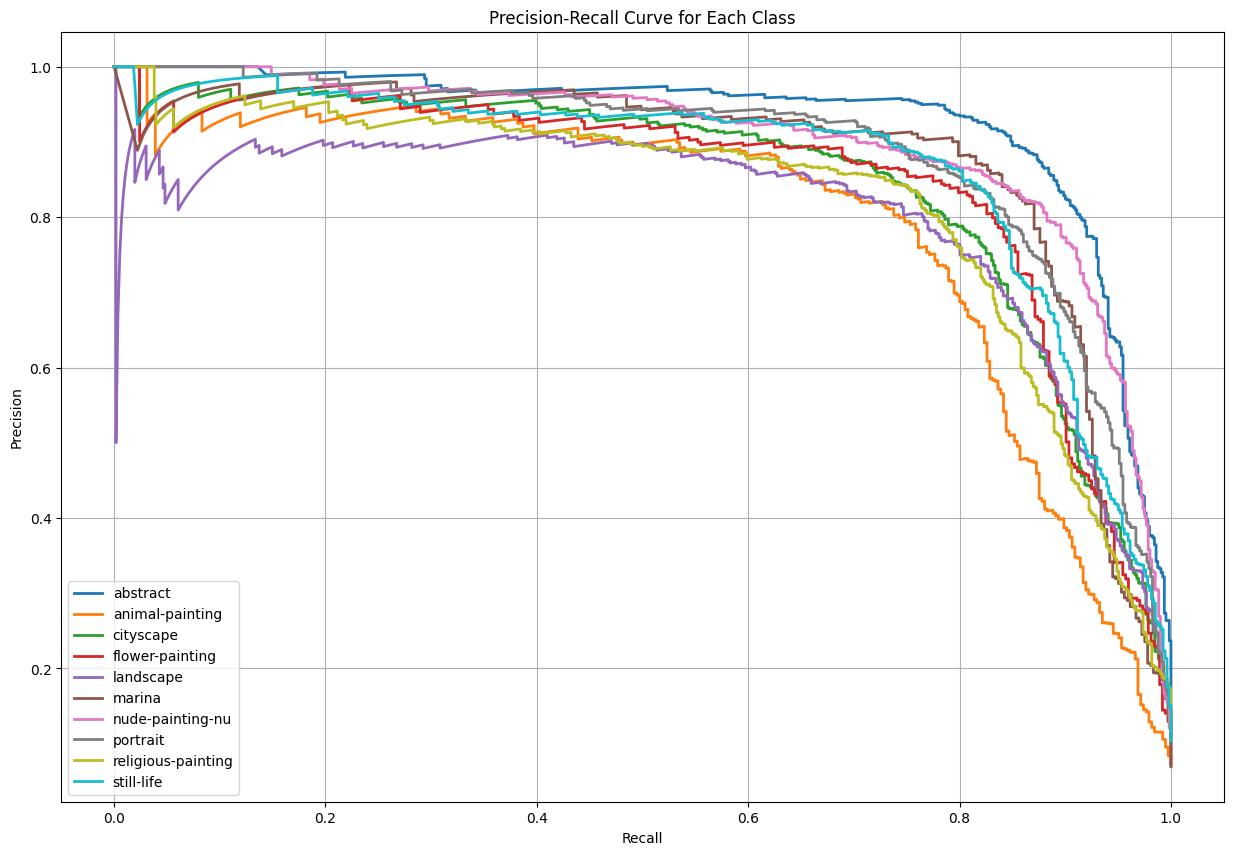

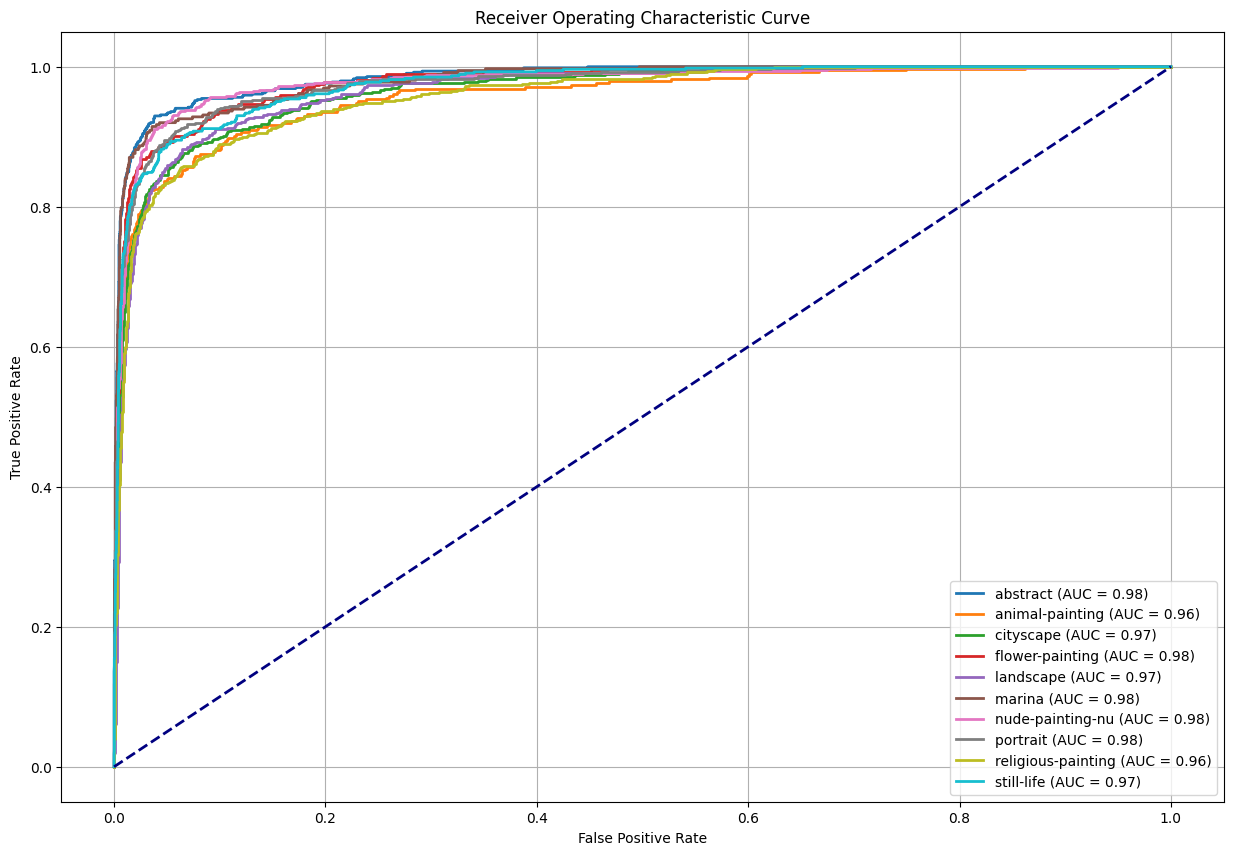

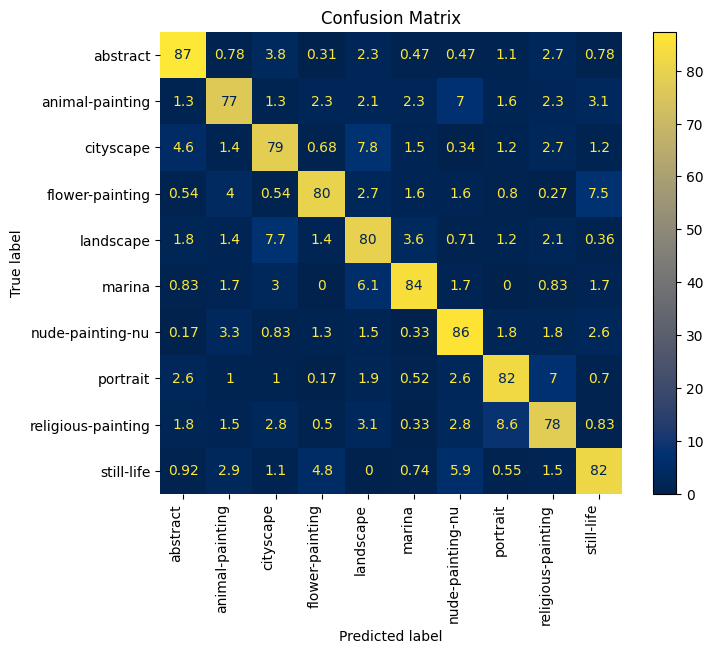

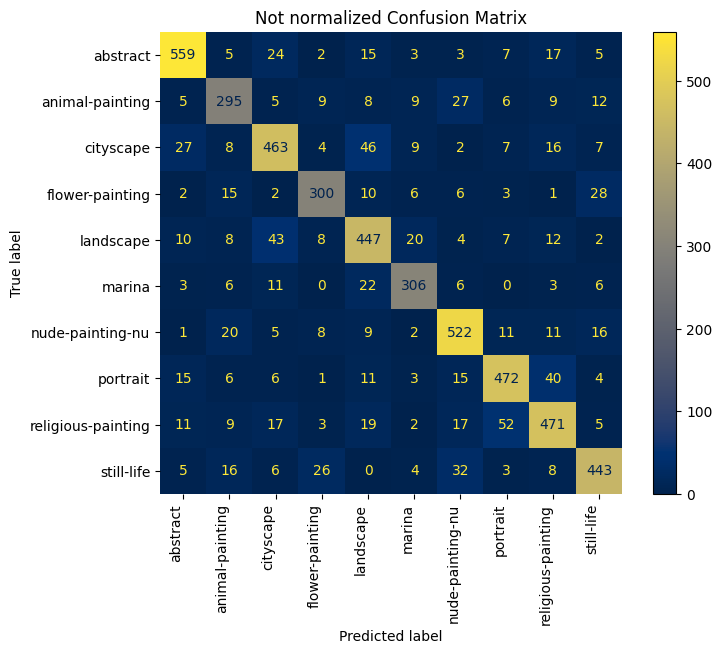

In [17]:
from sklearn.neural_network import MLPClassifier

mlp_model = MLPClassifier(
    hidden_layer_sizes=(460, 140, 113),  
    solver='lbfgs',
    learning_rate_init=0.0003442691569297126,
    alpha= 5.2073160459223636e-06,  
    batch_size=32,  
    activation='relu',  
    max_iter=451,  
    random_state=42,
    early_stopping=True  
)

mlp_model.fit(X_train_scaled, y_train)
frmodel_pred = mlp_model.predict(X_test_scaled)
frmodel_pred_proba = mlp_model.predict_proba(X_test_scaled)

evaluate_model(y_test,frmodel_pred,frmodel_pred_proba)

In [18]:
mlp_model = MLPClassifier(
    hidden_layer_sizes=(460, 140, 113),  
    solver='lbfgs',
    learning_rate_init=0.0003442691569297126,
    alpha= 5.2073160459223636e-06,  
    batch_size=32,  
    activation='relu',  
    max_iter=451,  
    random_state=42,
    early_stopping=True  
)

avg= e.kfold_crossvalidation(train_data, train_labels, 5,  mlp_model , 1)
print(avg)
print("....")

       Fold  Precision    Recall        F1  Accuracy  Train time  \
0         1   0.800737  0.800305  0.800319  0.800305   27.816662   
1         2   0.815679  0.815388  0.815420  0.815388   28.287449   
2         3   0.809531  0.809051  0.809161  0.809051   29.411952   
3         4   0.823962  0.823754  0.823626  0.823754   29.798441   
4         5   0.813356  0.812679  0.812857  0.812679   29.054005   
5   Average   0.812653  0.812235  0.812277  0.812235   28.873702   
6  1.581139   0.008504  0.008592  0.008540  0.008592    0.812156   

   Prediction time  
0         0.017424  
1         0.016367  
2         0.033463  
3         0.015669  
4         0.049987  
5         0.026582  
6         0.015020  
....
